<a href="https://colab.research.google.com/github/Rishikesh400/ANN-On-Pima-Diabetes-Dataset/blob/master/ANN_On_Pima_Diabetes_Using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating An ANN Using Pytorch

In [1]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import torch.nn as nn
import torch.nn.functional as F

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://raw.githubusercontent.com/rishibi16/ANN-On-Pima-Diabetes-Dataset/master/diabetes.csv%20-%20Sheet1.csv'
data = pd.read_csv(url)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

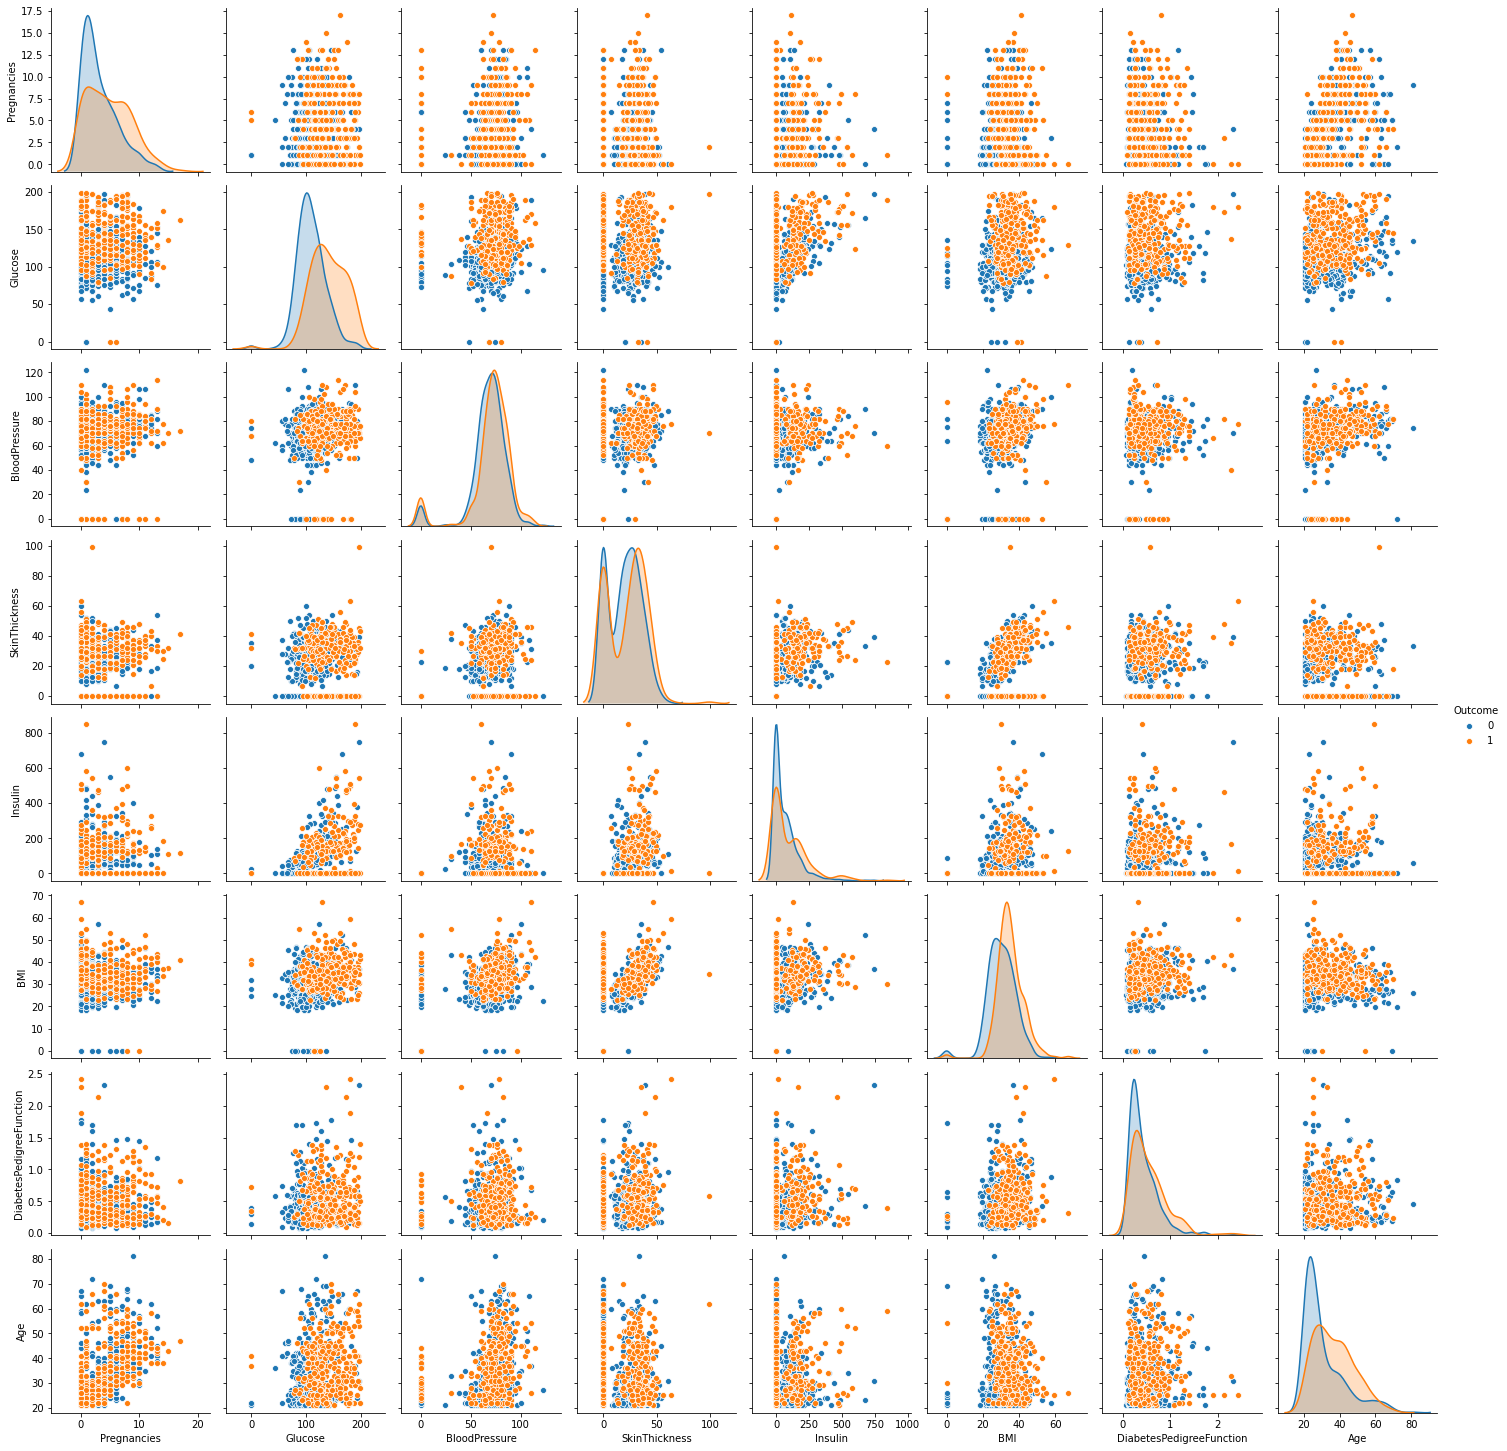

In [4]:
sns.pairplot(data, hue='Outcome')

In [5]:
X = data.drop('Outcome', axis=1).values
Y = data.Outcome.values

In [6]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [7]:
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [9]:
#### Creating Tensors
## Independent features needs to be converted into float tensor
## Float tensor is basically converts the data into float
## It is compulsory with independent features
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [10]:
data.shape

(768, 9)

In [11]:
#### Creating Model With PyTorch

class ANN_Model(nn.Module):
  def __init__(self, input_feature=8, hidden1=20, hidden2=20, out_feature=2):
    super().__init__()
    self.f_connected1 = nn.Linear(input_feature, hidden1)
    self.f_connected2 = nn.Linear(hidden1, hidden2)
    self.out = nn.Linear(hidden2, out_feature)
  def forward(self, x):
    x = F.relu(self.f_connected1(x))
    x = F.relu(self.f_connected2(x))
    x = self.out(x)
    return x

In [12]:
### Instantiate my ANN Model
torch.manual_seed(20)
model=ANN_Model()

In [13]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [14]:
#### Backward Propogation-- Define the loss_function, define the optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [15]:
epochs = 500
final_losses = []
for i in range(epochs):
  i+=1
  y_pred = model.forward(X_train)
  loss = loss_function(y_pred, Y_train)
  final_losses.append(loss)
  if i%10 == 1:
    print("Epoch Number: {} and The Loss: {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch Number: 1 and The Loss: 3.45721173286438
Epoch Number: 11 and The Loss: 1.7547036409378052
Epoch Number: 21 and The Loss: 1.4100369215011597
Epoch Number: 31 and The Loss: 0.9451974034309387
Epoch Number: 41 and The Loss: 1.1574182510375977
Epoch Number: 51 and The Loss: 0.8915753364562988
Epoch Number: 61 and The Loss: 0.7283691167831421
Epoch Number: 71 and The Loss: 0.8199499249458313
Epoch Number: 81 and The Loss: 0.6772931814193726
Epoch Number: 91 and The Loss: 0.6956122517585754
Epoch Number: 101 and The Loss: 0.8019213080406189
Epoch Number: 111 and The Loss: 0.7153995633125305
Epoch Number: 121 and The Loss: 0.6444703936576843
Epoch Number: 131 and The Loss: 0.6793992519378662
Epoch Number: 141 and The Loss: 0.6693852543830872
Epoch Number: 151 and The Loss: 0.6191176772117615
Epoch Number: 161 and The Loss: 0.6354078650474548
Epoch Number: 171 and The Loss: 0.6668111085891724
Epoch Number: 181 and The Loss: 0.6471998691558838
Epoch Number: 191 and The Loss: 0.6048519015

In [16]:
## Plot The Loss Function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

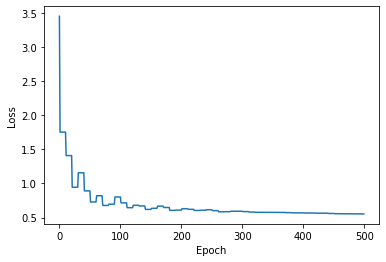

In [17]:
plt.plot(range(epochs), final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [18]:
### Prediction In X_test data
prediction = []
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_pred = model(data)
    prediction.append(y_pred.argmax().item())
    print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
1
1
1
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
1
1
1
0
0
1
1
0
0
0
1
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
1
0
1
0
1
1
1
1
0
1
0
0
1
0
1
1
0
0
1
0
0
0
0
0
0
0
0
1
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0


In [19]:
prediction

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, prediction)
cm

array([[80, 27],
       [22, 25]])

Text(159.0, 0.5, 'Predicted Values')

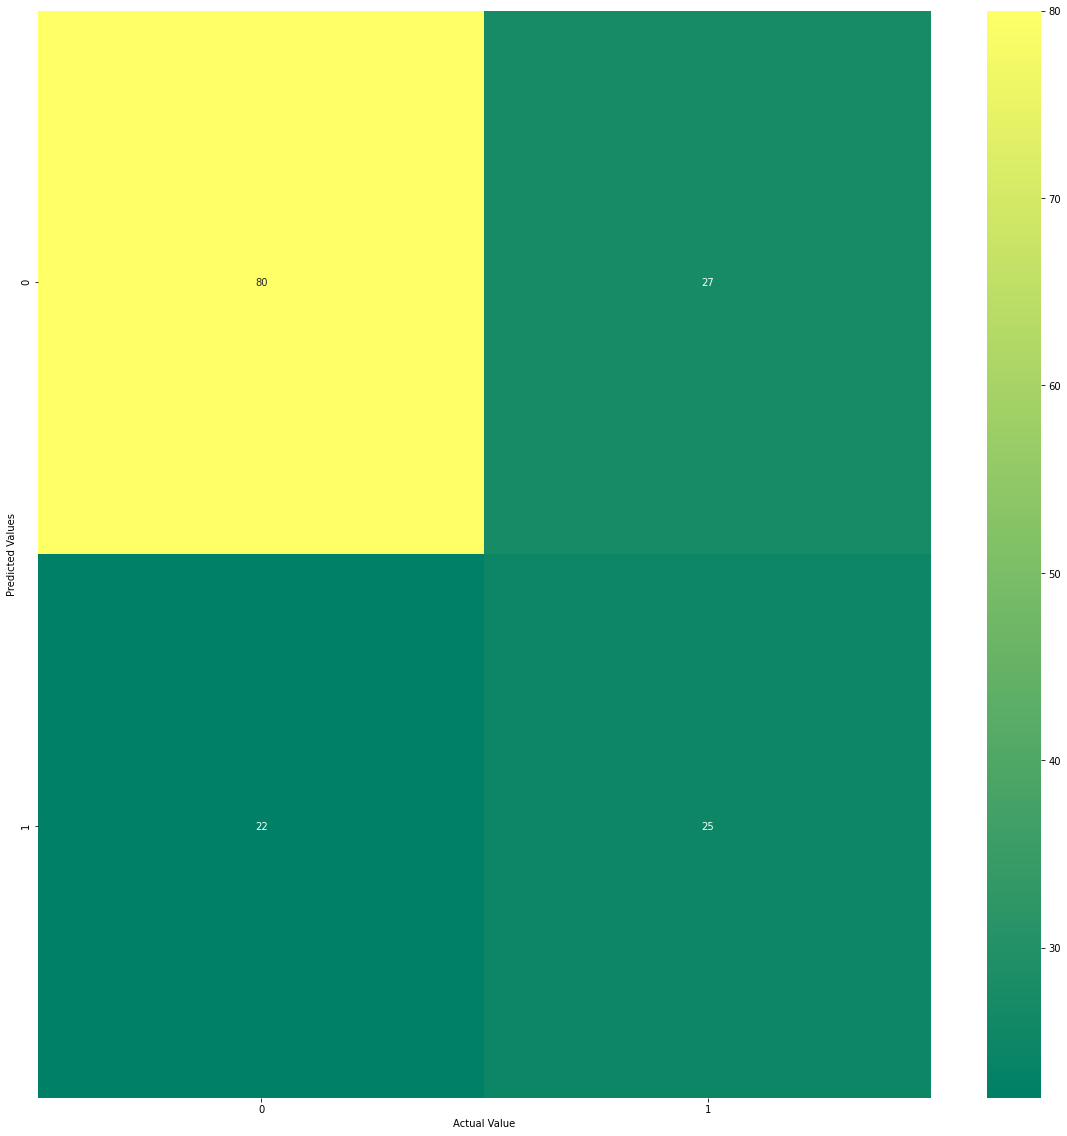

In [21]:
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, cmap='summer')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Values')

In [22]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, prediction)
score

0.6818181818181818

In [23]:
### Save the model
torch.save(model, 'diabetes.pt')

In [24]:
## Loading The Model
model = torch.load('diabetes.pt')

In [25]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [29]:
lst1 = [6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]